# Practical 1: Text Pre-processing
#### Ayoub Bagheri
<img src="https://github.com/bagheria/applied_tm/blob/master/monday/Practicals/Practical%201/img/uu_logo.png?raw=1" alt="logo" align="right" title="UU" width="50" height="20" />


#### Applied Text Mining - Utrecht Summer School

In this practical, we are first going to get acquainted with Python in Google Colab, then we will do some text preprocessing! Are you looking for Python documentation to refresh you knowledge of programming? If so, you can check https://docs.python.org/3/reference/

Google Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with:
* Zero configuration required
* Free access to GPUs
* Easy sharing

Colab notebooks are Jupyter notebooks that are hosted by Colab. You can find more detailed introductions to Colab [here](https://colab.research.google.com/notebooks/intro.ipynb), but we will also cover the basics.

### Pre-processing simple texts

### Let's get started!

**Here we are going to introduce Python and Google Colab a bit. If you are familiar with Python, start with question 11.**

1\. **Open Colab and create a new empty notebook to work with Python 3!**

Go to https://colab.research.google.com/ and login with your account. Then click on "File $\rightarrow$ New notebook".

If you want to insert a new code chunk below of the cell you are currently in, press `Alt + Enter`.

If you want to stop your code from running in Colab:
- Interrupt execution by pressing `ctrl + M I` or simply click the stop button
- Or: Press `ctrl + A` to select all the code of that particular cell, press `ctrl + X` to cut the entire cell code. Now the cell is empty and can be deleted by using `ctrl + M D` or by pressing the delete button. You can paste your code in a new code chunk and adjust it.

NB: On Macbooks, use `cmd` instead of `ctrl` in shortcuts.

2\. **Text is also known as a string variable, or as an array of characters. Create a variable `a` with the text value of `"Hello @Text Mining World! I'm here to learn everything, right?"`, and then print it!**

In [ ]:
a = "Hello @Text Mining World! I'm here to learn everything, right?"
a

"Hello @Text Mining World! I'm here to learn everything, right?"

3\. **Since this is an array, print the first and last character of your variable.**

In [ ]:
print(a[0]) # if you do not use the print function, it will print only the last argument in the cell
print(a[61])
l = len(a)
print("Length of your string is: ", l)
print(a[l-1])

H
?
Length of your string is:  62
?


4\. **Use the `!pip install` command and install the packages: `numpy`, `nltk`, `gensim`, and `spacy`.**

Generally, you only need to install each package once on your computer and load it again, however, in Colab you may need to reinstall a package once you are reconnecting to the network.

In [ ]:
!pip install -q numpy
!pip install -q nltk
!pip install -q gensim
!pip install -q spacy

5\. **Import (load) the `nltk` package and use the function `lower()` to convert the characters in string `a` to their lowercase form and save it into a new variable `b`.**

In [ ]:
import nltk
b = a.lower()
b

"hello @text mining world! i'm here to learn everything, right?"

NB: `nltk` comes with many corpora, toy grammars, trained models, etc. A complete list is posted at: http://nltk.org/nltk_data/

To install the data, after installing `nltk`, you could use the `nltk.download()` data downloader. We will make use of this in Question 8.

6\. **Use the `string` package to print the list of punctuations.**

Punctuations can separate characters, words, phrases, or sentences. In some applications they are very important to the task at hand, in others they are redundant and should be removed!

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


7\. **Use the punctuation list to remove the punctuations from the lowercase form of our example string `a`. Name your variable `c`.**

In [ ]:
# Remember there are many ways to remove punctuations! This is only one of them:
c = "".join([char for char in b if char not in string.punctuation])
print(c)

hello text mining world im here to learn everything right


8\. **Use the function `word_tokenize()` function from `nltk` and tokenize string `b`. Compare that with the tokenization of string `c`.**

In [ ]:
from nltk.tokenize import word_tokenize
print(word_tokenize(b))
print(word_tokenize(c))
# You might need to download Punkt Tokenizer Models
# In this case, run the code nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['hello', '@', 'text', 'mining', 'world', '!', 'i', "'m", 'here', 'to', 'learn', 'everything', ',', 'right', '?']
['hello', 'text', 'mining', 'world', 'im', 'here', 'to', 'learn', 'everything', 'right']


We see that the main difference is in punctuations, however, we also see that some words are now combined togehter in the tokenization of string `c`.

9\. **Use the function `Regexptokenizer()` from `nltk` to tokenize the string `b` whilst removing punctuations. This way you will avoid unnecessary concatenations.**

In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(b)

['hello',
 'text',
 'mining',
 'world',
 'i',
 'm',
 'here',
 'to',
 'learn',
 'everything',
 'right']

With this tokenizer, you get similar output as with tokenizing the string `c`.

10\. **Use funtion `sent_tokenize()` from the `nltk` package and split the string `b` into sentences. Compare that with the sentence tokenization of string `c`.**

In [ ]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(b))
print(sent_tokenize(c))

['hello @text mining world!', "i'm here to learn everything, right?"]
['hello text mining world im here to learn everything right']


An obvious question in your mind would be why sentence tokenization is needed when we have the option of word tokenization. Imagine you need to count average words per sentence. How would you calculate it? For accomplishing such a task, you need both the NLTK sentence tokenizer as well as the NLTK word tokenizer to calculate the ratio. Such output serves as an important feature for machine training as the answer would be numeric.

### Pre-processing a text corpus (dataset)

Pre-processing a dataset is similar to pre-processing simple text strings. First, we need to get some data. For this, we can use our own dataset, or we can scrape data from web or use social media APIs. There are also some websites with publicly available datasets:
- [CLARIN Resource Families](https://www.clarin.eu/portal)
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php?format=&task=&att=&area=&numAtt=&numIns=&type=text&sort=nameUp&view=table)
- [Kaggle](https://www.kaggle.com/)

Here, we want to analyze and pre-process the Taylor Swift song lyrics data from all her albums. The dataset can be downloaded from the course [website](https://ayoubbagheri.nl/applied_tm/monday/Practicals/Practical%201/data.zip) or alternatively from [Kaggle](https://www.kaggle.com/PromptCloudHQ/taylor-swift-song-lyrics-from-all-the-albums).

Upload `taylor_swift_lyrics.csv` to Google Colab. You can do this by clicking on the Files button on the very left side of Colab and drag and drop the data there or click the upload button. Alternatively you can mount Google Drive and upload the dataset there.

11\. **Read the `taylor_swift.csv` dataset. Check the dataframe using `head()` and `tail()` functions.**

In [ ]:
import pandas as pd
ts_lyrics = pd.read_csv("taylor_swift_lyrics.csv")

In [ ]:
ts_lyrics.head()

,Artist,Album,Title,Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ..."
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca..."
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...


In [ ]:
ts_lyrics.tail()

,Artist,Album,Title,Lyrics
127,Taylor Swift,folklore,mad woman,What did you think I'd say to that?\nDoes a sc...
128,Taylor Swift,folklore,epiphany,"Keep your helmet\nKeep your life, son\nJust a ..."
129,Taylor Swift,folklore,betty,"Betty, I won't make assumptions about why you ..."
130,Taylor Swift,folklore,peace,Our coming of age has come and gone\nSuddenly ...
131,Taylor Swift,folklore,hoax,My only one\nMy smoking gun\nMy eclipsed sun\n...


In [ ]:
ts_lyrics.iloc[0]

Artist                                         Taylor Swift 
Album                                          Taylor Swift 
Title                                             Tim McGraw
Lyrics     He said the way my blue eyes shinx\nPut those ...
Name: 0, dtype: object

In [ ]:
ts_lyrics.head(1)

,Artist,Album,Title,Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...


12\. **Add a new column to the dataframe and name it `Preprocessed Lyrics` , then fill the column with the preprocessed text including the steps in this and the following questions. First replace the `\n` sequences with a space character.**

In [ ]:
import re
def remove_linebreaks(text):
    """custom function to remove the line breaks"""
    return re.sub(r'\n', ' ', text)

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Lyrics"].apply(lambda text: remove_linebreaks(text))
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,He said the way my blue eyes shinx Put those G...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...","State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...","Drew looks at me, I fake a smile so he won't s..."
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...","I don't know what I want, so don't ask me 'Cau..."
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,You have a way of coming easily to me And when...


13\. **Write another custom function to remove the punctuations. You can use the previous method or make use of the function `maketrans()` from the `string` package.**

In [ ]:
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', string.punctuation))

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: remove_punctuation(text))
ts_lyrics.head()


,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,He said the way my blue eyes shinx Put those G...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",State the obvious I didnt get my perfect fanta...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",Drew looks at me I fake a smile so he wont see...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",I dont know what I want so dont ask me Cause I...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,You have a way of coming easily to me And when...


14\. **Change all the characters to their lower forms. Think about why and when we need this step in our analysis.**

In [ ]:
ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].str.lower()
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,he said the way my blue eyes shinx put those g...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state the obvious i didnt get my perfect fanta...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew looks at me i fake a smile so he wont see...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",i dont know what i want so dont ask me cause i...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,you have a way of coming easily to me and when...


15\. **List the 20 most frequent terms in this dataframe.**

In [ ]:
from collections import Counter

# To get all lyrics in one text, you can concatenate all of them using the " ".join(list) syntax,
# which joins all elements in a list separating them by whitespace.
text = " ".join(lyric for lyric in ts_lyrics["Preprocessed Lyrics"])

# split() returns list of all the words in the string
split_it = text.split()

# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)

# most_common() produces k frequently encountered input values and their respective counts.
most_occur = Counter.most_common(20)

print(most_occur)


[('i', 2377), ('you', 2319), ('the', 1623), ('and', 1403), ('me', 885), ('to', 843), ('a', 787), ('in', 686), ('it', 674), ('my', 642), ('of', 492), ('your', 475), ('we', 441), ('that', 436), ('all', 436), ('but', 428), ('like', 406), ('im', 404), ('this', 394), ('know', 380)]


You see that these are mainly stop words. Before removing them let's plot a wordcloud of our data.

16\. **Plot a wordcloud with max 50 words using the `WordCloud()` function from the `wordcloud` package. Use the command `?WordCloud` to check the help for this function.**

In [ ]:
!pip install -q wordcloud

In [ ]:
from wordcloud import WordCloud
?WordCloud

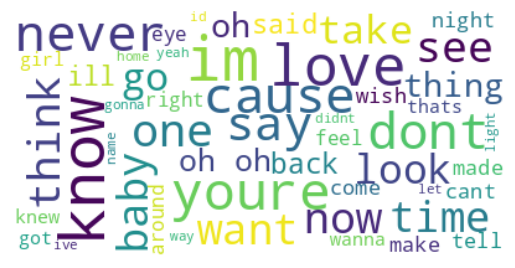

In [ ]:
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

17\. **Use the English stop word list from the `nltk` package to remove the stop words. Check the stop words and update them with your optional list of words, for example: "im", "youre", "id", "dont", "cant", "didnt", "ive", "ill", "hasnt". Show the 20 most frequent terms and plot the wordcould of 50 words again.**

In [ ]:
from nltk.corpus import stopwords
# run the code nltk.download('stopwords') if needed
stop_words = set(stopwords.words('english'))
print(stop_words)

{"hadn't", 'to', 'your', 'ain', 'does', 'weren', 'nor', 'doesn', 'wasn', 'only', 'now', 'own', 'don', 'll', 'have', 'under', 'did', 'for', 'me', 'won', 'a', 'are', 'very', 'before', "you've", 'again', 'so', 'y', 'too', 'with', 'why', 't', 'ma', 'when', "should've", "doesn't", 'herself', 'do', 'after', 'its', 'both', 'am', 'himself', 'doing', 'off', 'all', 'where', 'were', 'is', 's', "that'll", 'wouldn', 'against', 'itself', 'having', 'few', 'those', "you're", 're', 'who', 'each', "wouldn't", "you'll", "wasn't", 'any', 'by', 'couldn', 'this', "shan't", 'up', 'mustn', 'while', 'than', 'can', 'needn', 'd', 'he', 'aren', 'once', 'during', "weren't", 'just', 'him', "won't", 'the', 'been', 'their', 'further', 'at', "you'd", 'o', 'some', 'we', 'such', "mightn't", "needn't", 'hers', 'you', 'that', 'her', 'out', 'from', 'how', 'i', "it's", 'if', "isn't", 'myself', 'but', 'ours', 'which', 'them', 'an', 'here', 'ourselves', 'of', 'through', 'down', 'over', 'into', 'shouldn', 'they', 'more', 'shou

In [ ]:
stop_words.update(["im", "youre", "id", "dont", "cant", "didnt", "ive", "ill", "hasnt"])
# stop_words.discard('word') # this is when you want to remove a word from the list
print(stop_words)

{"hadn't", 'to', 'your', 'ain', 'does', 'weren', 'nor', 'doesn', 'id', 'wasn', 'only', 'now', 'own', 'don', 'll', 'have', 'under', 'did', 'for', 'dont', 'me', 'won', 'a', 'didnt', 'are', 'very', 'ill', 'before', "you've", 'again', 'so', 'y', 'too', 'with', 'why', 'cant', 't', 'ma', 'when', "should've", "doesn't", 'herself', 'do', 'after', 'im', 'youre', 'its', 'both', 'am', 'himself', 'doing', 'off', 'all', 'where', 'were', 'is', 's', "that'll", 'wouldn', 'against', 'itself', 'having', 'few', 'those', "you're", 're', 'who', 'each', "wouldn't", "you'll", "wasn't", 'any', 'by', 'couldn', 'this', "shan't", 'up', 'mustn', 'while', 'than', 'can', 'needn', 'd', 'he', 'aren', 'once', 'during', "weren't", 'just', 'him', "won't", 'the', 'been', 'their', 'further', 'at', "you'd", 'hasnt', 'o', 'some', 'we', 'such', "mightn't", "needn't", 'hers', 'you', 'that', 'her', 'out', 'from', 'how', 'i', "it's", 'if', "isn't", 'myself', 'but', 'ours', 'which', 'them', 'an', 'here', 'ourselves', 'of', 'thro

In [ ]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stop_words])

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: remove_stopwords(text))
ts_lyrics.head()

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,said way blue eyes shinx put georgia stars sha...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state obvious get perfect fantasy realize love...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew looks fake smile wont see want need every...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",know want ask cause still trying figure know w...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,way coming easily take take best start fight c...


In [ ]:
from collections import Counter

# To get all lyrics in one text, you can concatenate all of them using the " ".join(list) syntax,
# which joins all elements in a list separating them by whitespace.
text = " ".join(lyric for lyric in ts_lyrics["Preprocessed Lyrics"])

# split() returns list of all the words in the string
split_it = text.split()

# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)

# most_common() produces k frequently encountered input values and their respective counts.
most_occur = Counter.most_common(20)

print(most_occur)

[('like', 406), ('know', 380), ('oh', 322), ('never', 294), ('love', 246), ('back', 240), ('time', 224), ('cause', 213), ('one', 177), ('say', 176), ('see', 170), ('got', 159), ('wanna', 158), ('think', 153), ('baby', 153), ('come', 150), ('go', 149), ('want', 142), ('ever', 134), ('could', 133)]


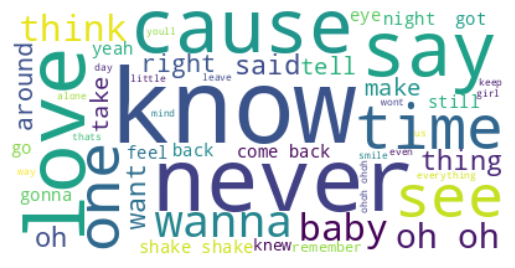

In [ ]:
wordcloud = WordCloud(max_words=50, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

18\. **We can apply stemming or lemmatization on our text data. Apply a lemmatizer from `nltk` and save the results.**

In [ ]:
from nltk.stem import WordNetLemmatizer
# run the code nltk.download('wordnet') if needed
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: lemmatize_words(text))
ts_lyrics.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Artist,Album,Title,Lyrics,Preprocessed Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...,said way blue eye shinx put georgia star shame...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan...",state obvious get perfect fantasy realize love...
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ...",drew look fake smile wont see want need everyt...
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca...",know want ask cause still trying figure know w...
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...,way coming easily take take best start fight c...


And here is the code for stemming:

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

# since we applied the lemmatization, we don't apply stemming; though you can try it!
# ts_lyrics["Preprocessed Lyrics"] = ts_lyrics["Preprocessed Lyrics"].apply(lambda text: stem_words(text))
# ts_lyrics.head()


The `PorterStemmer()` is for English language. If we are working with other languages, we can use other stemmers such as the `SnowballStemmer()` which supports:

In [ ]:
from nltk.stem.snowball import SnowballStemmer
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

### Vector space and BOW models

19\. **Use `CountVectorizer()` from the `sklearn` package and build a bag of words model on `Preprocessed Lyrics` based on term frequency. Check the shape of the output matrix.**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # for bag of words feature extraction

# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.
vectorizer1 = CountVectorizer(max_features = 3000)

# fit_transform() does two functions: First, it fits the model and learns the vocabulary;
# second, it transforms our data into feature vectors.
# The input to fit_transform should be a list of strings.
dtm = vectorizer1.fit_transform(ts_lyrics["Preprocessed Lyrics"])
print(dtm.shape)

(132, 2597)


In [ ]:
dtm

<132x2597 sparse matrix of type '<class 'numpy.int64'>'
	with 10530 stored elements in Compressed Sparse Row format>

In [ ]:
# we can convert it to a dataframe
dtm_df = dtm.toarray()
dtm_df = pd.DataFrame(dtm_df)
dtm_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


20\. **Inspect the first 100 terms in the vocabulary.**

In [ ]:
# Take a look at the words in the vocabulary
vocab = vectorizer1.get_feature_names_out()
print(vocab[1:100])

['16' '16th' '45' '4am' 'aah' 'abigail' 'absent' 'absurd' 'accent'
 'accident' 'accused' 'ace' 'achilles' 'aching' 'acing' 'across' 'act'
 'acted' 'actress' 'actually' 'add' 'adjusting' 'admit' 'adore'
 'adventure' 'affair' 'afraid' 'afterglow' 'afternoon' 'age' 'ago' 'ah'
 'ahah' 'ahahah' 'ahead' 'ahh' 'aim' 'aint' 'air' 'airplane' 'aisle'
 'album' 'aligned' 'alive' 'alls' 'almost' 'alone' 'along' 'alpha'
 'already' 'alright' 'altar' 'always' 'ambition' 'amen' 'american'
 'americana' 'amnesia' 'amount' 'andi' 'ane' 'angel' 'angry' 'another'
 'answer' 'anthem' 'anther' 'anticipation' 'anybody' 'anymore' 'anyone'
 'anything' 'anyway' 'anywhere' 'apart' 'apartment' 'apology' 'applause'
 'archer' 'architect' 'arent' 'argue' 'arm' 'armor' 'around' 'arrowhead'
 'ash' 'aside' 'ask' 'asked' 'asking' 'asleep' 'assume' 'assumption' 'ate'
 'ateam' 'attached' 'attack' 'attitude']


21\. **Using `TfidfVectorizer()`, you can create a model based on tfidf. Apply this vectorizer to your text data. Does the shape of the output matrix differ from dtm?**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer2 = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer2.fit_transform(ts_lyrics["Preprocessed Lyrics"])

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(132, 2597)


22\. **Use the `TfidfVectorizer()` to create an n-gram based model with n = 1 and 2. Use the `ngram_range` argument to determine the lower and upper boundary of the range of n-values for different n-grams to be extracted. (tip: use `?TfidfVectorizer`)**

In [ ]:
# Create TfidfVectorizer object
vectorizer3 = TfidfVectorizer(ngram_range=(1, 2))

# Generate matrix of word vectors
tfidf_matrix3 = vectorizer3.fit_transform(ts_lyrics["Preprocessed Lyrics"])

# Print the shape of tfidf_matrix
print(tfidf_matrix3.shape)

(132, 15016)


23\. **We want to compare the lyrics of Friends theme song with the lyrics of Taylor Swift's songs and find the most similar one. Use the string below. First, apply the pre-processing steps and then transform the text into count and tfidf vectors.

Do the bag of words models agree on the most similar song to Friends theme song?**

In [ ]:
friends_theme_lyrics = "So no one told you life was going to be this way. Your job's a joke, you're broke, you're love life's DOA. It's like you're always stuck in second gear, When it hasn\'t been your day, your week, your month, or even your year. But, I\'ll be there for you, when the rain starts to pour. I\'ll be there for you, like I\'ve been there before. I\'ll be there for you, cause you\'re there for me too."
friends_theme_lyrics

"So no one told you life was going to be this way. Your job's a joke, you're broke, you're love life's DOA. It's like you're always stuck in second gear, When it hasn't been your day, your week, your month, or even your year. But, I'll be there for you, when the rain starts to pour. I'll be there for you, like I've been there before. I'll be there for you, cause you're there for me too."

In [ ]:
friends_theme_lyrics = remove_punctuation(friends_theme_lyrics)
friends_theme_lyrics = friends_theme_lyrics.lower()
friends_theme_lyrics = remove_stopwords(friends_theme_lyrics)
friends_theme_lyrics = lemmatize_words(friends_theme_lyrics)
friends_theme_lyrics

'one told life going way job joke broke love life doa like always stuck second gear day week month even year rain start pour like cause'

In [ ]:
friends_theme_lyrics_tf = vectorizer1.transform([friends_theme_lyrics])
friends_theme_lyrics_tf.shape
dtm.shape

(132, 2597)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# compute and print the cosine similarity matrix
cosine_sim_dtm = cosine_similarity(dtm, friends_theme_lyrics_tf)

print(cosine_sim_dtm)

[[0.07295675]
 [0.05749499]
 [0.05668202]
 [0.099573  ]
 [0.09816136]
 [0.00975761]
 [0.16365771]
 [0.11501093]
 [0.02125256]
 [0.15038123]
 [0.07792865]
 [0.09200874]
 [0.17766726]
 [0.0360492 ]
 [0.0786839 ]
 [0.1062023 ]
 [0.23829304]
 [0.08566568]
 [0.15519271]
 [0.1352231 ]
 [0.03202563]
 [0.19158319]
 [0.09043166]
 [0.19051587]
 [0.10639904]
 [0.12562973]
 [0.13526614]
 [0.1340465 ]
 [0.10332549]
 [0.14529915]
 [0.08091962]
 [0.0428993 ]
 [0.05358677]
 [0.11510231]
 [0.03928371]
 [0.05463417]
 [0.0946985 ]
 [0.0745356 ]
 [0.24685715]
 [0.07198268]
 [0.09507654]
 [0.11511347]
 [0.11136921]
 [0.10401235]
 [0.1946593 ]
 [0.15567091]
 [0.21439196]
 [0.13088543]
 [0.11021668]
 [0.09369712]
 [0.11888042]
 [0.06581261]
 [0.00903711]
 [0.21465394]
 [0.22794562]
 [0.04007421]
 [0.06975801]
 [0.05602768]
 [0.01563873]
 [0.10146346]
 [0.13488377]
 [0.1500909 ]
 [0.0521599 ]
 [0.16455472]
 [0.20490974]
 [0.17563692]
 [0.13237606]
 [0.02857238]
 [0.03055662]
 [0.17989569]
 [0.0790393 ]
 [0.00

In [ ]:
import numpy as np
max_index = np.argmax(cosine_sim_dtm, axis=0)
print(cosine_sim_dtm[max_index])
max_index

[[0.24685715]]


array([38])

In [ ]:
ts_lyrics.iloc[max_index]

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
38,Taylor Swift,Speak Now,The Story of Us,I used to think one day we'd tell the story of...,used think one day wed tell story u met spark ...


In [ ]:
ts_lyrics["Preprocessed Lyrics"].iloc[38]

'used think one day wed tell story u met spark flew instantly people would say theyre lucky one used know place spot next searching room empty seat cause lately even know page oh simple complication miscommunications lead fall many thing wish knew many wall break standing alone crowded room speaking dying know killing like killing yeah know say since twist fate broke story u look lot like tragedy next chapter howd end way see nervously pulling clothes trying look busy best avoid starting think one day tell story u losing mind saw held pride like held oh scared see ending pretending nothing tell miss know never heard silence quite loud standing alone crowded room speaking dying know killing like killing yeah know say since twist fate broke story u look lot like tragedy looking like contest act like care le liked better side battle hand would lay armor youd say youd rather love fight many thing wish knew story u might ending soon standing alone crowded room speaking dying know killing li

In [ ]:
friends_theme_lyrics_tfidf = vectorizer3.transform([friends_theme_lyrics])
print(friends_theme_lyrics_tfidf.shape)
print(tfidf_matrix3.shape)
# compute and print the cosine similarity matrix
cosine_sim_tfidf = cosine_similarity(tfidf_matrix3, friends_theme_lyrics_tfidf)

print(cosine_sim_tfidf)

(1, 15016)
(132, 15016)
[[0.02369657]
 [0.01318075]
 [0.01128244]
 [0.03986478]
 [0.03108815]
 [0.00181568]
 [0.02572803]
 [0.02691028]
 [0.00512609]
 [0.04532813]
 [0.01615807]
 [0.00787449]
 [0.03826574]
 [0.0068687 ]
 [0.01320367]
 [0.01245819]
 [0.09768082]
 [0.03284433]
 [0.01891928]
 [0.05104409]
 [0.00801751]
 [0.045455  ]
 [0.02005361]
 [0.04590047]
 [0.0319897 ]
 [0.01850863]
 [0.02299573]
 [0.0238499 ]
 [0.01617267]
 [0.03525199]
 [0.02914826]
 [0.01417113]
 [0.01017535]
 [0.02329621]
 [0.01165122]
 [0.00883778]
 [0.0213434 ]
 [0.01468301]
 [0.052752  ]
 [0.01398688]
 [0.02316361]
 [0.02104993]
 [0.03310764]
 [0.01013489]
 [0.04137598]
 [0.04265813]
 [0.04249053]
 [0.03391019]
 [0.02922056]
 [0.01882679]
 [0.01167784]
 [0.01196412]
 [0.00448242]
 [0.03975051]
 [0.02942139]
 [0.02500672]
 [0.0149794 ]
 [0.01541409]
 [0.00149821]
 [0.01839457]
 [0.03851785]
 [0.02703587]
 [0.01044214]
 [0.01812665]
 [0.04455981]
 [0.03015706]
 [0.03756264]
 [0.00366365]
 [0.00325763]
 [0.033311

In [ ]:
max_index = np.argmax(cosine_sim_tfidf, axis=0)
print(cosine_sim_tfidf[max_index])
max_index

[[0.09768082]]


array([16])

In [ ]:
ts_lyrics.iloc[max_index]

,Artist,Album,Title,Lyrics,Preprocessed Lyrics
16,Taylor Swift,Fearless,Forever & Always,"Once upon a time, I believe it was a Tuesday w...",upon time believe tuesday caught eye caught on...


In [ ]:
ts_lyrics["Preprocessed Lyrics"].iloc[16]

'upon time believe tuesday caught eye caught onto something hold onto night looked eye told loved kidding cause seems thing breaking almost never speak feel welcome anymore baby happened please tell cause one second perfect halfway door stare phone still called feel low feel nothing flashback said forever always oh rain bedroom everything wrong rain rain gone cause said forever always line say something way honest made run hide like scared little boy looked eye thought knew minute sure here everything coming nothing here silence cut core going thought knew minute anymore stare phone still called feel low feel nothing flashback said forever always oh rain bedroom everything wrong rain rain gone cause said forever always mean baby think oh back baby back forget everything back baby back forget everything cause rain bedroom everything wrong rain rain gone cause said forever always oh stare phone still called feel low feel nothing flashback said forever always rain bedroom everything wrong